In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [2]:
import tensorflow.keras as keras

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
# Mapping of class labels to their respective names
class_names = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck'
}

In [5]:
x_train.shape

(50000, 32, 32, 3)

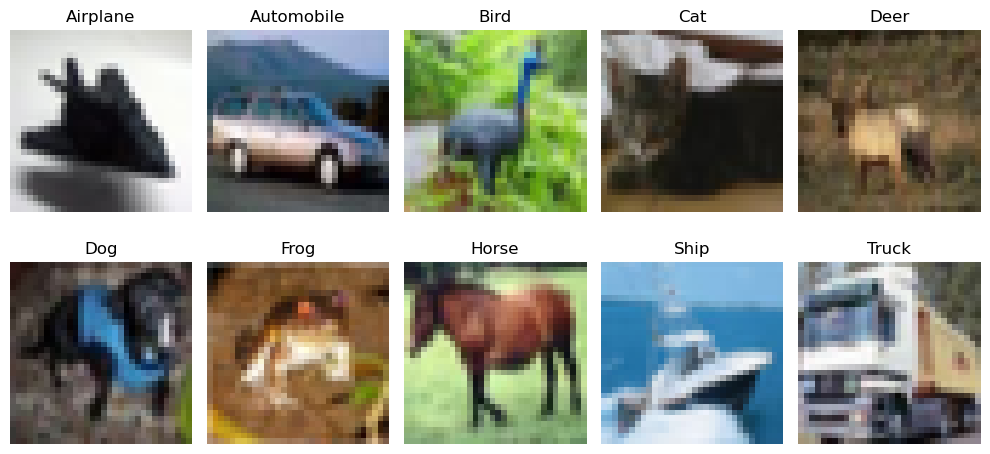

In [6]:
# Create a dictionary to store one image for each class
one_image_per_class = {}

# Find one image for each class
for class_label in range(10):
    idx = (y_train[:, 0] == class_label).nonzero()[0][0]
    one_image_per_class[class_names[class_label]] = x_train[idx]

# Display one image for each class
plt.figure(figsize=(10, 5))
for idx, (class_name, image) in enumerate(one_image_per_class.items(), start=1):
    plt.subplot(2, 5, idx)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [7]:
#normalizing the pixel values
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [8]:
y_train[0]

array([6], dtype=uint8)

In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation ='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [11]:
#unrolling the 3D output into 1D output
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [12]:
model.compile(optimizer = 'Adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [13]:
import os
checkpoint_dir = 'checkpoints/'
checkpoint_path = os.path.dirname(checkpoint_dir)
callback = tf.keras.callbacks.ModelCheckpoint(filepath = os.path.dirname(checkpoint_dir),
                                             save_weights_only=True,
                                             verbose =1)


In [161]:
history = model.fit(x_train,
                    y_train,
                    epochs = 10,
                    validation_data = (x_test, y_test),
                   callbacks = [callback])

Epoch 1/10
1558/1563 [============================>.] - ETA: 0s - loss: 1.1199 - accuracy: 0.6073
Epoch 1: saving model to checkpoints
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1198 - accuracy: 0.6073 - val_loss: 1.0962 - val_accuracy: 0.6125
Epoch 2/10
1561/1563 [============================>.] - ETA: 0s - loss: 0.9799 - accuracy: 0.6572
Epoch 2: saving model to checkpoints
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9798 - accuracy: 0.6573 - val_loss: 0.9676 - val_accuracy: 0.6678
Epoch 3/10
1559/1563 [============================>.] - ETA: 0s - loss: 0.8933 - accuracy: 0.6881
Epoch 3: saving model to checkpoints
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8929 - accuracy: 0.6882 - val_loss: 0.9542 - val_accuracy: 0.6679
Epoch 4/10
1558/1563 [============================>.] - ETA: 0s - loss: 0.8296 - accuracy: 0.7105
Epoch 4: saving model to checkpoints
1563/1563 [==============================] - 8s 5ms/step - lo

313/313 - 1s - loss: 0.9145 - accuracy: 0.6971 - 743ms/epoch - 2ms/step


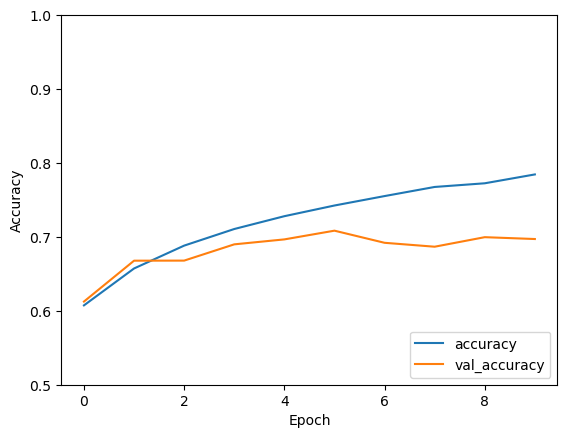

In [163]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [164]:
# Evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

# Loads the weights
model.load_weights(os.path.dirname(checkpoint_dir))

# Re-evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

313/313 - 1s - loss: 0.9145 - accuracy: 0.6971 - 923ms/epoch - 3ms/step
Untrained model, accuracy: 69.71%
313/313 - 1s - loss: 0.9145 - accuracy: 0.6971 - 661ms/epoch - 2ms/step
Restored model, accuracy: 69.71%


In [165]:
model.trainable_variables

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
 array([[[[-0.18194905,  0.00031368, -0.12192781, -0.02791637,
           -0.06301475,  0.2674773 ,  0.03988692, -0.09872019,
            0.08208908,  0.05397162,  0.18591492,  0.06192538,
            0.00825839,  0.21609578,  0.13922334,  0.1777224 ,
            0.09968399, -0.1498951 , -0.0606024 ,  0.05368671,
            0.33336362,  0.0945265 , -0.10391748, -0.07796882,
            0.01463538,  0.2178317 ,  0.00208785, -0.07555335,
           -0.11937235, -0.36235705, -0.03015576, -0.09001891],
          [-0.13643925,  0.17318365, -0.05740344, -0.11103253,
           -0.21858491, -0.24571453, -0.10444456, -0.09428102,
            0.15831985,  0.15736103,  0.09554545,  0.02036125,
            0.08723021,  0.08213427,  0.24079779,  0.01035781,
            0.00215177, -0.01528573, -0.12404987, -0.06807914,
           -0.02239793, -0.09966987,  0.05974828,  0.09110285,
            0.03878079,  0.18500902, -0.042

In [18]:
data = x_train[0]
# Write the array to disk
with open('test.txt', 'w') as outfile:
    # I'm writing a header here just for the sake of readability
    # Any line starting with "#" will be ignored by numpy.loadtxt
    outfile.write('# Array shape: {0}\n'.format(data.shape))
    
    # Iterating through a ndimensional array produces slices along
    # the last axis. This is equivalent to data[i,:,:] in this case
    for data_slice in data:

        # The formatting string indicates that I'm writing out
        # the values in left-justified columns 7 characters in width
        # with 2 decimal places.  
        np.savetxt(outfile, data_slice, fmt='%-7.5f')

        # Writing out a break to indicate different slices...
        outfile.write('# New slice\n')

In [19]:
demo = x_train[0]
i,j = 3,3
receptive_field_size = 3
receptive_field = demo[i - receptive_field_size//2:i + receptive_field_size//2 + 1,
                    j - receptive_field_size//2:j + receptive_field_size//2 + 1,
                    2]
receptive_field

array([[0.03137255, 0.09019608, 0.16078432],
       [0.09803922, 0.10980392, 0.12941177],
       [0.13333334, 0.15294118, 0.14117648]], dtype=float32)

In [20]:
np.random.seed(3)

# CNN from Numpy Only

In [55]:
def act_func(ac_func, data):
    if (ac_func =='relu'):
        return np.maximum(0, data)

In [162]:
#vanilla convolution
class Conv:
    def __init__(self, units, kernel_size, activation_func):
        self.units = units
        self.activation_func = activation_func
        self.F = kernel_size[0]
        self.kernel = np.random.randn(*kernel_size)
        #print(self.kernel)
        
    def forward(self, inp_img):
        W1, H1, D1 = inp_img.shape
        W2 = W1 - self.F + 1
        H2 = H1 - self.F + 1
        new = np.zeros((W2, H2, self.units))
        #print(new.shape)
        
        for u in range(self.units):
            for i in range(W2):
                for j in range(H2):
                    receptive_region = inp_img[i:i+self.F, j:j+self.F, :]
                    new[i,j,u] = np.sum(receptive_region * self.kernel[:,:,:,u])
        
        if activation_func:
            return act_func(activation_func, new)
        
        return new

In [59]:
#assuming MaxPooling is AxB, assuming the stride is the same as well
# avoiding overlapping region
class MaxPool:
    def __init__(self, size):
        self.size = size
        self.pool_W, self.pool_H = size
        
    def forward(self, inp):
        W2, H2, D = inp.shape
        output_W2 = int((W2-self.pool_W)/2) + 1
        output_H2 = int((H2-self.pool_H)/2) + 1
        new = np.zeros((output_W2, output_H2, D))
        for i in range(output_W2):
            for j in range(output_H2):
                for u in range(D):
                    pooling_window = inp[i*output_W2:i*output_W2+self.pool_W,
                                        j*output_H2:j*output_H2+self.pool_H,
                                        u]
                    try:
                        new[i,j,u] = np.max(pooling_window)
                    except:
                        pass
        return new

In [60]:
class Flatten:
    def __init__(self):
        self.inp_shape = None
    
    def forward(self, inp_x):
        self.inp_shape = inp_x.shape
        return inp_x.reshape((-1,))

In [61]:
class Dense:
    def __init__(self, inp_units, out_units):
        self.inp_units = inp_units
        self.out_units = out_units
        self.weights = np.random.randn(inp_units, out_units)
        self.biases = np.zeros((1, out_units))
        self.input = None
        
    def forward(self, inp_x):
        self.input = inp_x
        print(f'Dense layer has {(self.inp_units + 1) * self.out_units} params')
        return np.dot(inp_x, self.weights) + self.biases
    

In [115]:
def softmax(data):
    exponentials = np.exp(data-np.max(data))
    prob = exponentials/np.sum(data)
    return prob

In [119]:
a = np.random.randint(1,10,10)
print(a)
print(softmax(a))

[3 6 4 4 2 5 2 8 2 3]
[0.00017277 0.00347014 0.00046963 0.00046963 0.00006356 0.00127659
 0.00006356 0.02564103 0.00006356 0.00017277]


In [108]:
y_train[0]

array([6], dtype=uint8)

In [156]:
units = 32
filter_size = (3, 3)
activation_func = 'relu'
conv_layer = Conv(units, (*filter_size, x_train[0].shape[2], units), activation_func)
output = conv_layer.forward(x_train[0])
print(f'Conv layer has {(filter_size[0] * filter_size[1]*x_train[0].shape[2] + 1) * units } parameters and gives the shape {output.shape}')

mp1 = MaxPool((2,2))
mp1_output=mp1.forward(output)
print(f'Max Pooling gives the output {mp1_output.shape}')

units = 64
filter_size = (3, 3)
activation_func = 'relu'
conv_layer2 = Conv(units, (*filter_size, mp1_output.shape[2], units), activation_func)
output_conv2 = conv_layer2.forward(mp1_output)
print(f'Conv layer has {(filter_size[0] * filter_size[1]*mp1_output.shape[2] + 1) * units } parameters and gives the shape {output_conv2.shape}')

mp2 = MaxPool((2,2))
mp2_output=mp2.forward(output_conv2)
print(f'Max Pooling gives the output {mp2_output.shape}')

units = 64
filter_size = (3, 3)
activation_func = 'relu'
conv_layer3 = Conv(units, (*filter_size, mp2_output.shape[2], units), activation_func)
output_conv3 = conv_layer3.forward(mp2_output)
print(f'Conv layer has {(filter_size[0] * filter_size[1]*mp2_output.shape[2] + 1) * units } parameters and gives the shape {output_conv3.shape}')

flat_layer = Flatten()
flat_output = flat_layer.forward(output_conv3)
print(f'Flat layer has the output of shape {flat_output.shape}')

dense_layer1 = Dense(flat_output.shape[0], 64)
dense_output1 = dense_layer1.forward(flat_output)
print(f'Dense layer has output of shape {dense_output1.shape}')

dense_layer2 = Dense(dense_output1.shape[1], 10)
dense_output2 = dense_layer2.forward(dense_output1)
print(f'Dense layer has output of shape {dense_output2.shape}')
prob_output = softmax(dense_output2)
print(prob_output)

Conv layer has 896 parameters and gives the shape (30, 30, 32)
Max Pooling gives the output (15, 15, 32)
Conv layer has 18496 parameters and gives the shape (13, 13, 64)
Max Pooling gives the output (6, 6, 64)
Conv layer has 36928 parameters and gives the shape (4, 4, 64)
Flat layer has the output of shape (1024,)
Dense layer has 65600 params
Dense layer has output of shape (1, 64)
Dense layer has 650 params
Dense layer has output of shape (1, 10)
[[0.         0.         0.         0.         0.         0.
  0.00013166 0.         0.         0.        ]]


In [157]:
y_train[0][0], np.max(prob_output)

(6, 0.00013166323289758356)

In [158]:
#sparse categorical crossentropy
def SparseCategoricalCrossEntropy(y_train, prob):
    y_true_onehot = np.zeros_like(prob)
    y_true_onehot[np.arange(len(y_train)), y_train]=1
    y_true_onehot

    #to avoid log of 0 and divided by 0
    epsilon = 1e-10
    loss = -np.mean(np.sum(y_true_onehot * np.log(prob+epsilon)))
    return loss

In [159]:
SparseCategoricalCrossEntropy(y_train[0], prob_output)

8.935262401817

# BACKPROPAGATION IN CNN WITH NUMPY

In [167]:
#TODO
# Am I missing something here?
"""
Need to compute:
-dL_dYCap
-dYCap_dZ2
-dZ2_dW2, dZ2_dB2
-dZ1_dW1, dZ1_dB1
-dZ1_dF
-dF_dRelu3
-dRelu3_dC3
-dC3_dMP2
-dMP2_dRelu2
-dRelu2_dC2
-dC2_dMP1
-dMP1_dRelu1
-dRelu1_dC1
-dC1_dX
"""

'\nNeed to compute:\n-dL_dYCap\n-dYCap_dZ2\n-dZ2_dW2, dZ2_dB2\n-dZ1_dW1, dZ1_dB1\n-dZ1_dF\n-dF_dRelu3\n-dRelu3_dC3\n-dC3_dMP2\n-dMP2_dRelu2\n-dRelu2_dC2\n-dC2_dMP1\n-dMP1_dRelu1\n-dRelu1_dC1\n-dC1_dX\n'

In [168]:
# need to put it all inside loop once back propagation is done

32


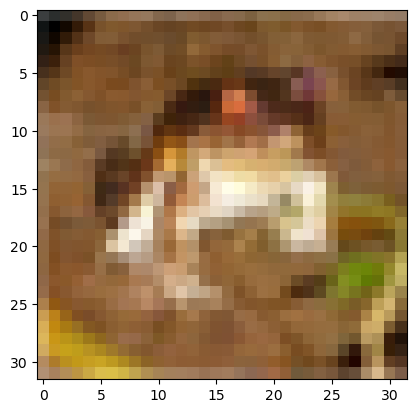

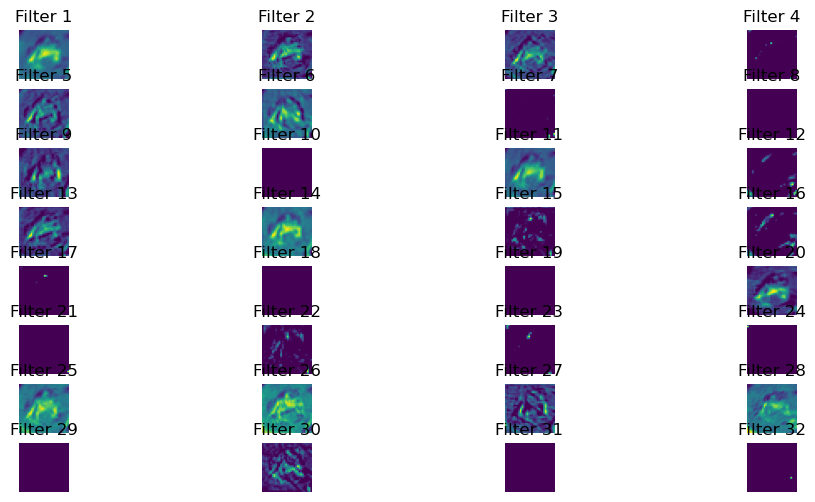

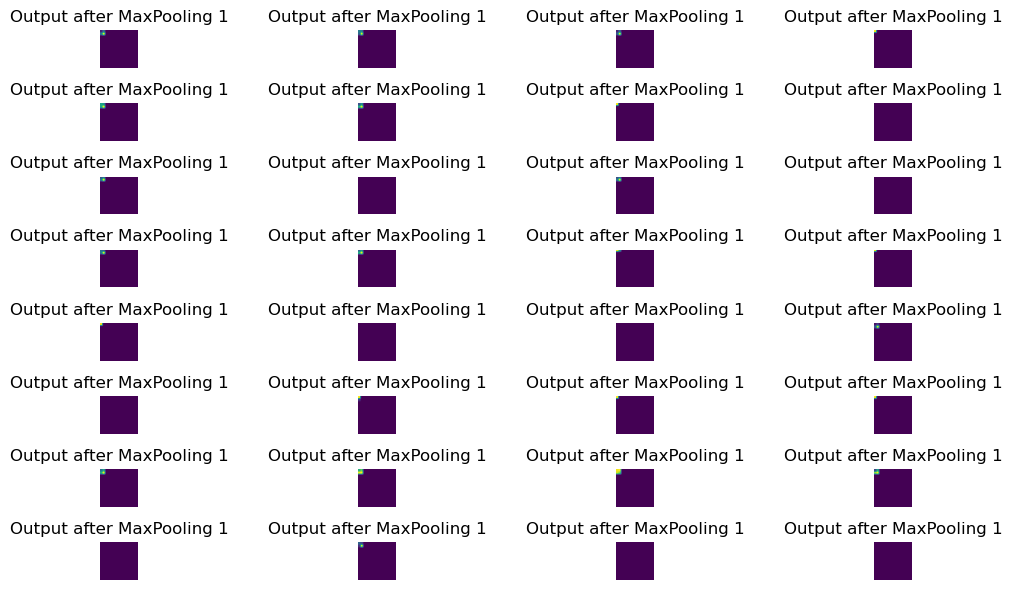

In [160]:
plt.imshow(x_train[0])
num_filters = output.shape[2]
print(num_filters)

# Plot each filter's output as an image
plt.figure(figsize=(12, 6))
for i in range(num_filters):
    plt.subplot(8, num_filters // 8, i + 1)
    plt.imshow(output[:, :, i])  # Display each filter's output as a grayscale image
    plt.title(f'Filter {i+1}')
    plt.axis('off')


plt.figure(figsize=(12, 6))
for i in range(mp1_output.shape[2]):
    plt.subplot(8, num_filters // 8, i + 1)
    plt.imshow(mp1_output[:,:,i])
    plt.title('Output after MaxPooling 1')
    plt.axis('off')
plt.tight_layout()
plt.show()

